# グラフ分割問題

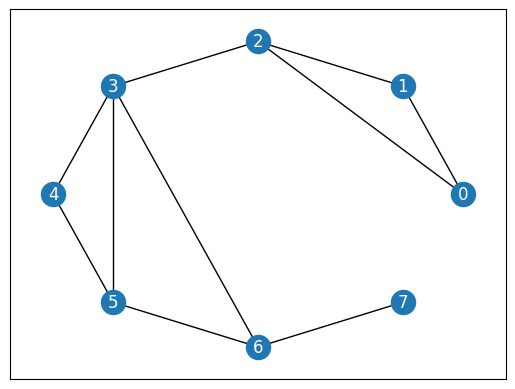

In [2]:
import networkx as nx
    
N = 4  # グラフの頂点数の半分
G = nx.Graph()
G.add_nodes_from(range(2 * N))
# 2つの頂点をつなぐ辺を定義
edge_list = [
    (0, 1),
    (0, 2),
    (1, 2),
    (2, 3),
    (3, 4),
    (3, 5),
    (3, 6),
    (4, 5),
    (5, 6),
    (6, 7),
]
G.add_edges_from(edge_list)
    
pos = nx.circular_layout(G)
    
nx.draw_networkx(G, node_size=300, font_color="w", pos=pos)

## 定式化
### 決定変数
$q_i=0$ のとき、頂点 $i$ はグループ $0$ に属する。
$q_i=1$ のとき、頂点 $i$ はグループ $1$ に属する。

In [3]:
from amplify import VariableGenerator
    
gen = VariableGenerator()
q = gen.array("Binary", 2 * N)

### 制約条件
$q_i=0$ となる頂点数$=N$となればよい。
制約条件は以下の通り。
$$
    \sum_{i=0}^{2N-1} q_i = N
$$

### 目的関数（コスト関数）
グラフ分割問題の最適解＝異なる集合に属する頂点同士を結ぶ<b>辺の数が最小</b>。

$G$ の頂点 $u$ と $v$ が異なる集合に属する＝$q_u$と$q_v$の<b>排他的論理和</b>が1となる。
$q_u$と$q_v$の排他的論理和は以下で表される。
$$
 -2 q_u q_v + q_u + q_v
$$

辺で結ばれている頂点の組 $(u,v)$ すべてのうち、$u$ と $v$ が異なる集合に属するものの数が最小となればよい。
目的関数は、以下の通り。
$$
    \sum_{(u,v) \in E} \text{xor} (q_u,q_v) = \sum_{(u,v) \in E} -2 q_u q_v + q_u + q_v
$$

In [14]:
# 制約関数
from amplify import equal_to
constraint = equal_to(q, N)

# コスト関数
from amplify import sum
cost = sum([q[u] ^ q[v] for u, v in G.edges])
# ^ はamplifyが提供する排他的論理和

# モデル
model = cost + constraint

In [15]:
from amplify import FixstarsClient, solve
from datetime import timedelta
    
client = FixstarsClient()
client.parameters.timeout = timedelta(milliseconds=1000)  # タイムアウトは 1000 ms
client.token = "AE/ar62PjutSqmuoEa8bvfyrEmjE1rCpOqE"  # ローカル環境等で使用する場合は、Fixstars Amplify AE のアクセストークンを入力してください。
    
# 構築した model に対して求解を実行
result = solve(model, client)
    
if len(result) == 0:
    print("解が見つかりませんでした。")
else:
    print("解が見つかりました。")

解が見つかりました。


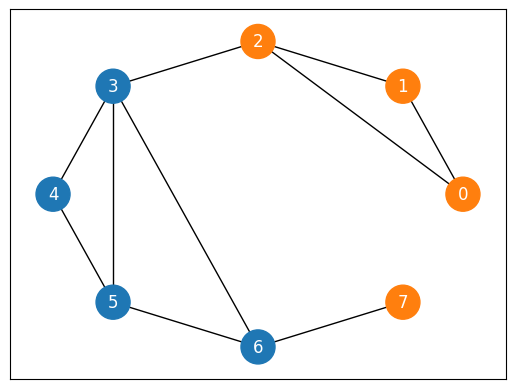

In [16]:
values = q.evaluate(result.best.values)
colors = [f"C{int(value)}" for value in values]
    
nx.draw_networkx(G, node_size=600, node_color=colors, font_color="w", pos=pos)